In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

**Определение (R2-score или коэффициент детерминации):**

$$ R^2 = 1 - \frac{MSE(y, \widehat{y})}{D y} $$

# Ridge и Lasso регрессия. *Lp*  регуляризация

### Ridge&Lasso

На практике точные формулы для подсчета коэффициентов линейной регрессии не используются, а используется метод градиентного спуска который состоит в подсчете производных от ошибки и шагу в направлении наискорейшего убывания функции (мы стремимся минимизировать функцию потерь).

Эти методы работают быстрее, чем точное вычисление обратных матриц и их перемножение.
Более того, во многих задачах это единственный способ обучить модель, так как не всегда (на самом деле почти никогда) удается выписать точную формулу для минимума сложного функционала ошибки.

Рассмотрим реализации линейных регрессоров в библиотеке sklearn



In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [3]:
from sklearn.datasets import load_wine

In [4]:
wine_data = load_wine()
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
wine_data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
wine_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
X = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])
y = wine_data['target']

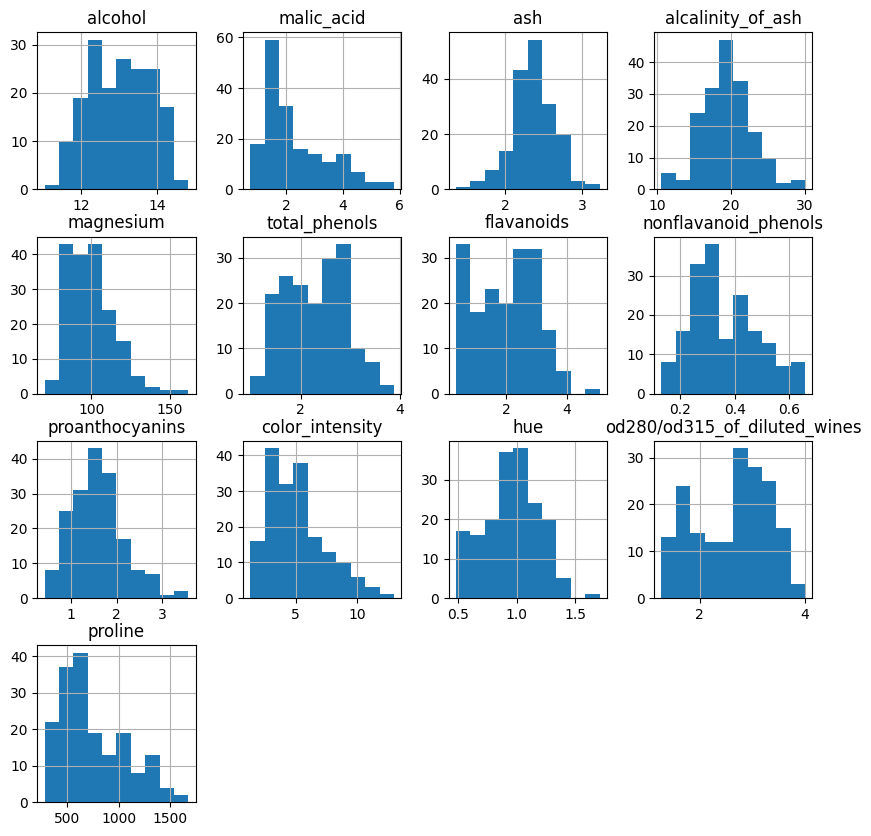

In [8]:
_ = X.hist(X.columns, figsize=(10, 10))

<Axes: >

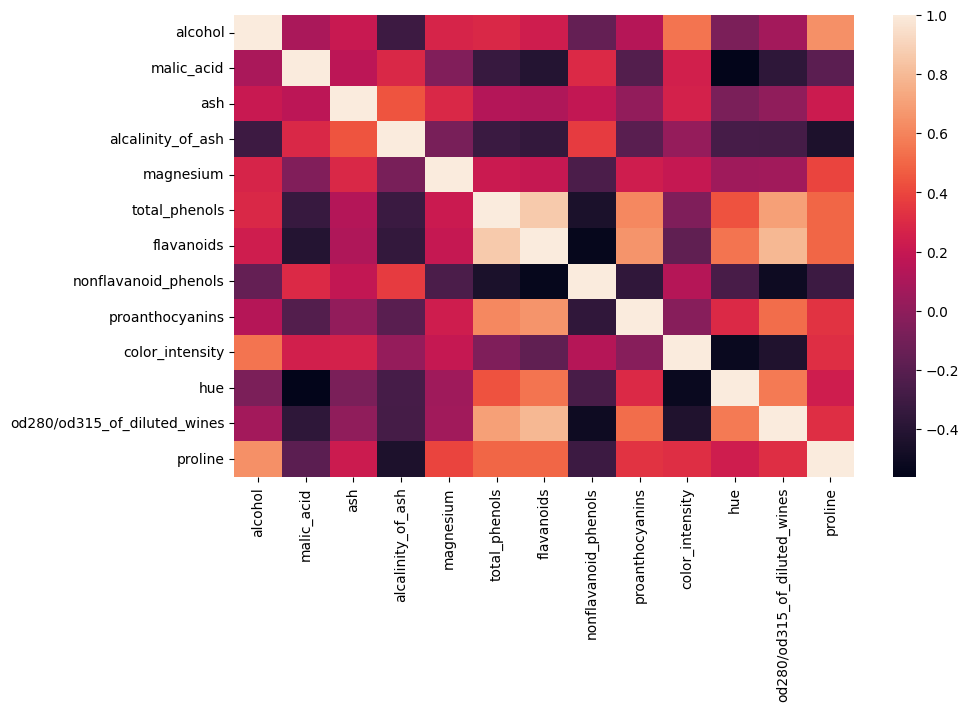

In [9]:
import seaborn as sns

plt.figure(figsize = (10,6))
sns.heatmap(X.corr())

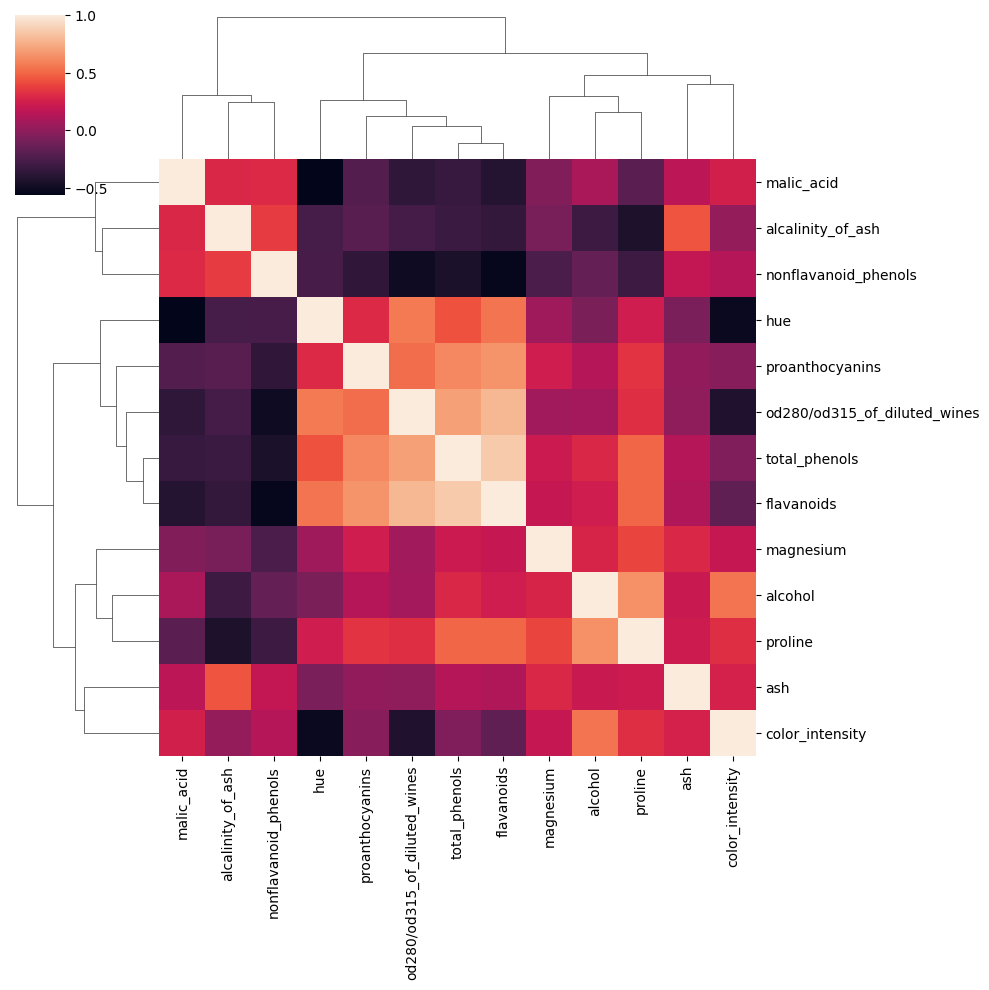

In [10]:
sns.clustermap(X.corr())

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=99
)

** Нормализации данных**

 1. Центрирование данных: Он вычитает среднее значение каждого признака из соответствующих значений, чтобы сместить распределение признака к нулю.

2. Масштабирование данных: Затем он делит каждое значение признака на его стандартное отклонение, чтобы привести все признаки к одному масштабу (со средним, равным 0, и стандартным отклонением, равным 1).

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Метрики оценки модели регрессии:

1. Mean Squared Error (MSE):
   - MSE является одной из основных метрик для оценки качества модели регрессии.
   - Она измеряет среднее квадратичное отклонение предсказанных значений от фактических значений.


2. Коэффициент детерминации (R-squared или R²):
   - R² - это мера того, насколько хорошо модель регрессии объясняет вариацию в данных.
   - Он измеряется в диапазоне от 0 до 1, где 1 означает, что модель объясняет 100% вариации в данных.


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)
test_predictions = regressor.predict(X_test)

print('test mse: ', mean_squared_error(y_test, test_predictions))
print('r2 score: ', r2_score(y_test, test_predictions))

test mse:  0.07475703133417173
r2 score:  0.8738475096235852


In [18]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


<BarContainer object of 13 artists>

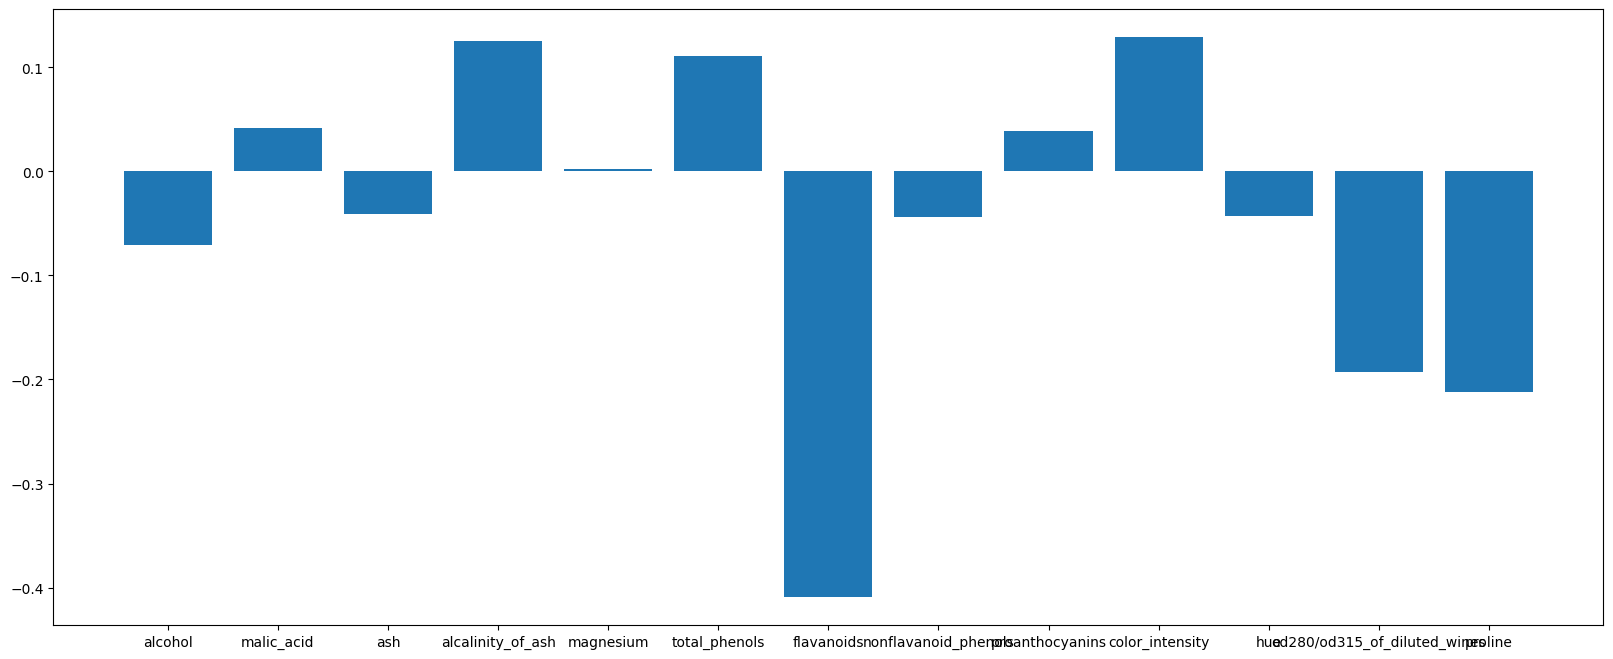

In [19]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, regressor.coef_)

L2-регуляризация (Ridge): Добавляет к функции потерь величину, пропорциональную квадрату суммы коэффициентов.

Ridge (L2-регуляризация) сильно штрафует за слишком большие веса и не очень за малые. При увеличении коэффициента перед регуляризатором веса меняются плавно

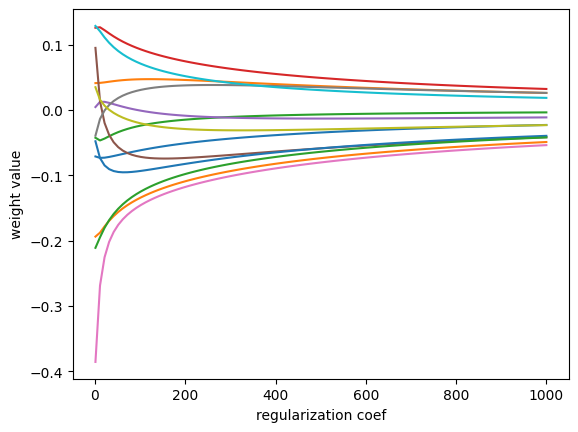

In [20]:
alphas = np.linspace(1, 1000, 100)

weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    ridge_regressor = Ridge(alpha)
    ridge_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.xlabel('regularization coef')
plt.ylabel('weight value')
plt.show()

L1-регуляризация (Lasso): Добавляет к функции потерь величину, пропорциональную абсолютной сумме коэффициентов.


Lasso одинаково сильно штрафует малые и большие веса, поэтому при достаточно большом коэффициенте регуляризации многие признаки становятся равными нулю, при этом остаются только наиболее инфромативные. Этот факт можно использовать для решения задачи отбора признаков.

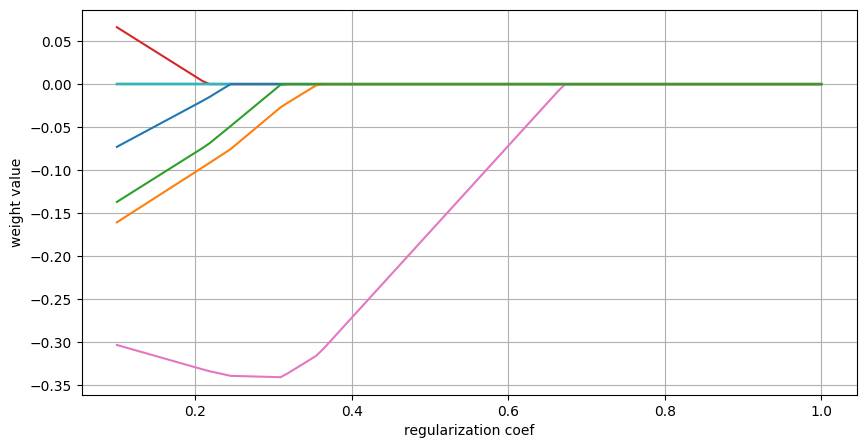

In [21]:
alphas = np.linspace(0.1, 1, 100)

plt.figure(figsize=(10, 5))
weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    lasso_regressor = Lasso(alpha)
    lasso_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, lasso_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.xlabel('regularization coef')
plt.ylabel('weight value')
plt.grid()
plt.show()

In [22]:
ridge = Ridge(0.1)
ridge.fit(X_train, y_train)
print('\n r2 score ridge: ', r2_score(y_test, ridge.predict(X_test)))
print('test mse ridge: ', mean_squared_error(y_test, ridge.predict(X_test)))

lasso = Lasso(0.1)
lasso.fit(X_train, y_train)
print('\n r2 score lasso: ', r2_score(y_test, lasso.predict(X_test)))
print('test mse lasso: ', mean_squared_error(y_test, lasso.predict(X_test)))


 r2 score ridge:  0.8740521897249454
test mse ridge:  0.07463573942225459

 r2 score lasso:  0.8096651433986044
test mse lasso:  0.11279102613416034
